In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import hstrat
import typing
from downstream import dstream
from track_ca import track_ca_history, plot_phylo_at, plot_ancestry_at
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl

import imageio
from pathlib import Path

In [3]:
teeplot_subdir = os.environ.get("NOTEBOOK_NAME", "track_ca")

## Try on test data

In [4]:
import track_ca
track_ca.MultiTracker

track_ca.MultiTracker

In [5]:
data = np.array([
    [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
    [[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]],
    [[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]],
    [[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]],
    [[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]],
    [[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]],
    [[0, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
    [[0, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
    [[0, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
    [[0, 1, 1, 0, 1, 0, 1, 0, 1, 0]],
], dtype=np.bool_)
phylo_df, newick_str = track_ca_history(data, dstream.stretched_algo, 8, 64, 1)

100%|██████████| 5/5 [00:00<00:00, 67650.06it/s]


In [6]:
phylo_df

,dstream_data_id,id,ancestor_id,hstrat_rank,hstrat_differentia_bitwidth,dstream_S,data_hex,extant,row,col,state,rank,origin_time
0,9223372036854775807,0,0,0,64,8,None,None,NaN,NaN,NaN,0,18446744073709551608
1,9223372036854775807,1,0,0,64,8,None,None,NaN,NaN,NaN,0,18446744073709551608
2,9223372036854775807,2,1,3,64,8,None,None,NaN,NaN,NaN,3,18446744073709551611
3,9223372036854775807,3,2,7,64,8,None,None,NaN,NaN,NaN,7,18446744073709551615
4,0,4,3,8,64,8,00000009302981fdc28620eeb79dae154c776ee2d1f8be...,True,0.0,1.0,1.0,8,0
5,1,5,3,8,64,8,00000009302981fdc28620eeb79dae154c776ee2d1f8be...,True,0.0,2.0,1.0,8,0
6,2,6,2,8,64,8,00000009302981fdc28620eeb79dae154c776ee2d1f8be...,True,0.0,4.0,1.0,8,0
7,9223372036854775807,7,1,5,64,8,None,None,NaN,NaN,NaN,5,18446744073709551613
8,3,8,7,8,64,8,00000009302981fdc28620eec75d7779b8d0d26734b1ea...,True,0.0,6.0,1.0,8,0
9,4,9,7,8,64,8,00000009302981fdc28620eec75d7779b8d0d26734b1ea...,True,0.0,8.0,1.0,8,0


In [7]:
newick_str

'(((:3,:3):5,(:5,(:1,:1):4):3):0):0;'

In [8]:
data = np.ones((1000, 100, 100), dtype=np.bool_)
phylo_df, newick_str = track_ca_history(data, dstream.steady_algo, 256, 4, 1)

100%|██████████| 10000/10000 [00:00<00:00, 177226.86it/s]


In [9]:
newick_str

'((((:91,(:79,(:67,(:55,(:39,:39):16):12):12):12):8,(:87,(:63,(:19,(:15,:15):4):44):24):12,(:87,(:67,(:55,:55,(:47,:47):8):12):20):12,(:95,(:59,(:47,(:31,:31):16):12):36):4,(:95,(:63,(:59,:59,(:23,:23,((:11,:11):4,:15):8):36):4):32):4,((:59,(:35,(:31,:31,(:11,:11):20):4):24):36,((:83,(:79,(:67,(:35,(:31,(:7,(:3,:3):4):24):4):32):12):4):8,(:87,(:79,(:75,(:63,(:55,(:51,(:27,(:23,:23,(:19,:19,:19):4):4):24):4):8):12):4):8):4):4,(:71,(:67,(:63,(:51,(:43,:43):8):12):4):4):24,(:91,(:79,(:63,(:51,(:31,(:27,(:7,:7):20):4):20):12):16):12):4,(:83,(:79,(:67,(:59,(:51,(:47,(:39,(:31,:31):8):8):4):8):8):12):4):12,((:79,(:75,(:39,:39,(:31,:31):8):36):4):12,(:75,(:71,(:39,(:27,:27,(:23,(:3,:3):20):4):12):32):4):16):4,((:67,(:51,(:39,(:35,(:3,:3):32):4):12):16):24,:91,((:79,(:71,(:35,:35):36):8):8,(:67,:67,(:39,:39):28):20):4,(:87,(:75,(:67,(:51,:51):16):8):12):4,(:75,(:63,:63,(:47,(:27,(:19,(:15,:15):4):8):20):16):12):16,(:83,(:43,(:39,(:23,:23):16):4):40):8,((:71,(:67,(:63,(:55,(:39,(:23,(:11,:11):1

In [10]:
with open("output_test.newick", "w") as f:
    f.write(newick_str)

## Try on real data

#### From MaceNCA

In [11]:
data = np.load("hist.npy").astype(np.bool_)
phylo_df, newick_str = track_ca_history(data, dstream.steady_algo, 64, 1, 1)

 16%|█▌        | 162/999 [00:27<02:21,  5.91it/s]


KeyboardInterrupt: 

In [ ]:
with open("output_mace.newick", 'w') as f:
    f.write(newick_str)

### From the outlier rule

In [ ]:
data = np.load("outlier_history.npy")
fossil_range = {400}
phylo_df, newick_str = track_ca_history(data, dstream.steady_algo, 64, 1, R=1, fossil_range=fossil_range)
with open("output_outlier.newick", 'w') as f:
    f.write(newick_str)
phylo_df["gol_state"] = phylo_df["state"]
phylo_df["taxon_label"] = phylo_df["id"]
phylo_df["origin_time"] = phylo_df["origin_time"] + 64
phylo_df = hstrat._auxiliary_lib.alifestd_mark_root_id(phylo_df)
phylo_df = hstrat._auxiliary_lib.alifestd_collapse_unifurcations(phylo_df)
phylo_df

100%|██████████| 872/872 [00:00<00:00, 320602.48it/s]


,dstream_data_id,id,ancestor_id,hstrat_rank,hstrat_differentia_bitwidth,dstream_S,data_hex,extant,row,col,state,rank,origin_time,gol_state,taxon_label,root_id
0,9223372036854775807,0,0,0,1,64,None,None,NaN,NaN,NaN,0,0,NaN,0,0
1,9223372036854775807,1,0,103,1,64,None,None,NaN,NaN,NaN,103,103,NaN,1,0
2,9223372036854775807,2,1,215,1,64,None,None,NaN,NaN,NaN,215,215,NaN,2,0
3,9223372036854775807,3,2,359,1,64,None,None,NaN,NaN,NaN,359,359,NaN,3,0
4,9223372036854775807,4,3,383,1,64,None,None,NaN,NaN,NaN,383,383,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,868,955,853,857,1,64,0000035a589b59c4df0b050a,True,190.0,101.0,1.0,857,857,1.0,955,0
956,9223372036854775807,956,800,847,1,64,None,None,NaN,NaN,NaN,847,847,NaN,956,0
957,869,957,956,857,1,64,0000035a589b59c4ce4b1a8a,True,190.0,142.0,1.0,857,857,1.0,957,0
958,870,958,886,857,1,64,0000035a589b59e4df0b050a,True,191.0,77.0,1.0,857,857,1.0,958,0


#### Generate a plot showing the phylogeny at a specific generation

teeplots/track_ca/rank=858+viz=subplots+ext=.pdf
teeplots/track_ca/rank=858+viz=subplots+ext=.png


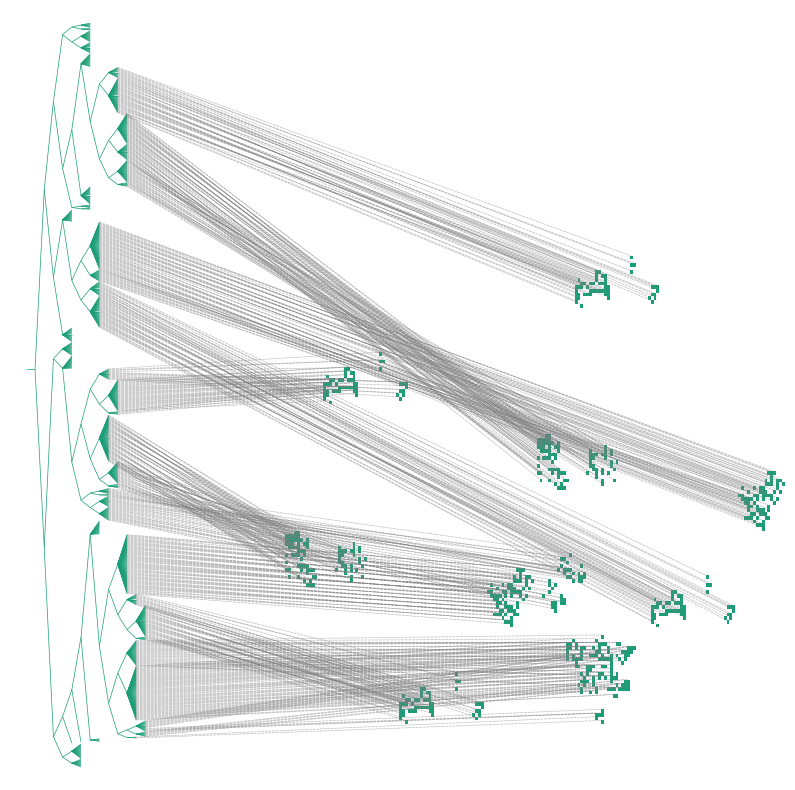

In [ ]:
plot_phylo_at(phylo_df, teeplot_subdir, fossil_rank=None)

In [ ]:
for i in fossil_range:
    plot_phylo_at(phylo_df, teeplot_subdir, show=False, fossil_rank=i)

In [ ]:
images = []
for filename in sorted((Path()/"teeplots"/teeplot_subdir).glob("rank=*.png"), key=lambda p: float(p.name.removeprefix("rank=").split('+')[0])):
    images.append(imageio.imread(filename)[:, :, :3])
imageio.mimsave('ca.gif', images, fps=1, loop=0)

#### Generate a plot visualizing the relationships between two generations

teeplots/track_ca/child-rank=858.0+parent-rank=400+viz=subplots+ext=.pdf
teeplots/track_ca/child-rank=858.0+parent-rank=400+viz=subplots+ext=.png


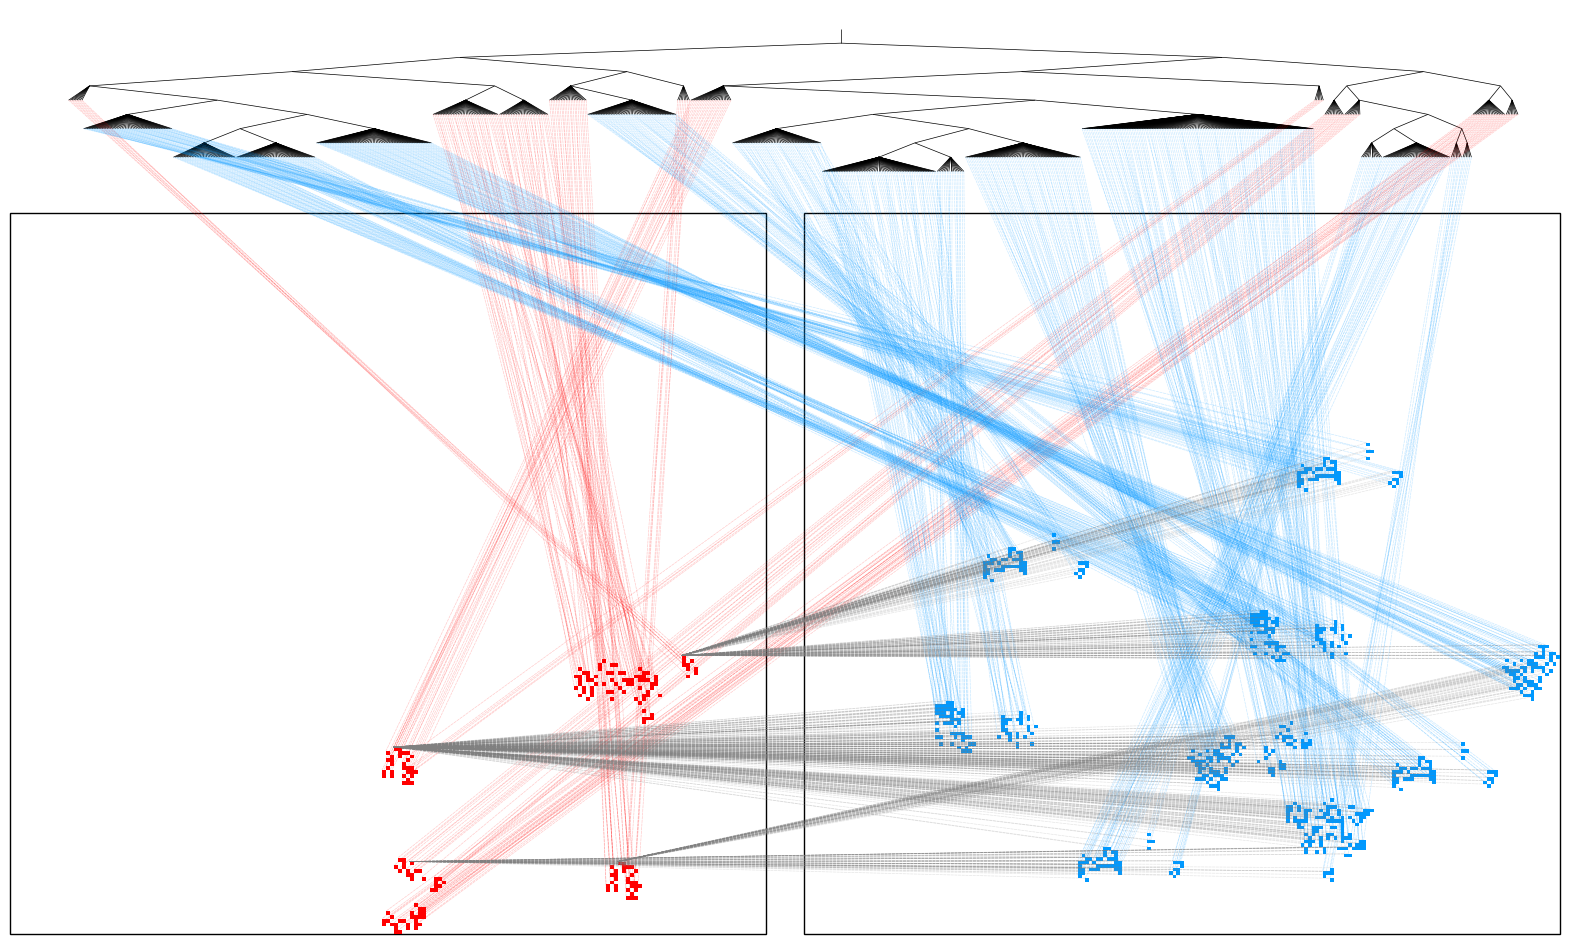

In [ ]:
plot_ancestry_at(phylo_df, 400, show=True, teeplot_subdir=teeplot_subdir)